# Open Rice

** 1.) ** We scrapped a data set from open rice but it needs cleaning:

* Remove duplicate data
* Use a regex to clean the review col
* Remove the trailing commar from the adress col


In [5]:
import pandas as pd
import re

In [4]:
openrice = pd.read_csv("data/open-rice.csv")
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,(133 Reviews),Below $50
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,(30 Reviews),$201-400
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,(43 Reviews),$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,(39 Reviews),Below $50
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,(57 Reviews),$51-100


In [6]:
openrice.shape

(26165, 8)

In [355]:
# %load solutions/openrice_1.py


In [356]:
openrice.shape

(26165, 8)

In [357]:
openrice.drop_duplicates(inplace=True)
openrice.shape

(21299, 8)

In [358]:
# %load solutions/clean_reviews.py
#  ANS(21299,8)

In [7]:
# Use a regex to clean the review col
openrice['number_of_reviews']=openrice.number_of_reviews.apply(lambda x: re.search(r'\d+',x).group(0))
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,43,$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100


In [360]:
# Remove the trailing commar from the adress col
print(openrice['address'])
openrice['address']= openrice.address.apply(lambda x: re.search(r'.+(?=,)',x).group()if x[-1]==',' else x)
openrice.head()



0                           Shop J-K., 200 Hollywood Road,
1                                 G/F, 108 Hollywood Road,
2                                 G/F, 206 Hollywood Road,
3        Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...
4                                G/F, 38 Queens Road West,
                               ...                        
26155                   G/F, Po Chi Court, 15 Ship Street,
26158    Shop 3-5, 2/F, Nan Fung Tower, 173 Des Voeux R...
26159      2/F, Hotel Pennington, 13-15 Pennington Street,
26160    Rooftop, Courtyard By Marriott Hong Kong Sha T...
26164          9/F, Hung To Centre, 94-96 How Ming Street,
Name: address, Length: 21299, dtype: object


,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
0,"Shop J-K., 200 Hollywood Road",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50
1,"G/F, 108 Hollywood Road",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400
2,"G/F, 206 Hollywood Road",5517,5,Thai,31,Chachawan,43,$201-400
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50
4,"G/F, 38 Queens Road West",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100


In [361]:
x="Shop J-K., 200 Hollywood Road,"
re.search(r'.+(?=,)',x).group()


'Shop J-K., 200 Hollywood Road'

** 2.) ** Which resturant in Hong Kong is the most favorable? In terms of likes, in terms of bookmarks?

In [362]:
openrice.sort_values(by=['likes','bookmarks'],inplace = True, ascending= False)
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range
569,"G/F, 47-49 Parkes Street",35511,267,Hong Kong Style,1585,Australia Dairy Company 澳洲牛奶公司,2595,Below $50
23128,"G/F, 47-49 Parkes Street",35511,267,Tea Restaurant,1585,Australia Dairy Company 澳洲牛奶公司,2595,Below $50
20272,"G/F, 7A-7B Tak Hing Street",13740,267,Western,1585,Pom's Kitchen & Deli,2595,$101-200
243,2 Mei Lun Street,38286,76,Hong Kong Style,929,Sing Heung Yuen 勝香園,1309,Below $50
12245,2 Mei Lun Street,38286,76,Dai Pai Dong,929,Sing Heung Yuen 勝香園,1309,Below $50


In [363]:
# %load solutions/openrice_2.py


** 3.) ** What is the price range for the whole open rice dataset?

In [364]:
openrice.price_range.value_counts()

Below $50     7808
$101-200      5221
$51-100       4963
$201-400      2511
$401-800       635
Above $801     161
Name: price_range, dtype: int64

In [365]:
# %load solutions/openrice_3.py


** 4.) ** By grouping price_range with mean and median, what can you observe from bookmarks and likes?


In [366]:
openrice.groupby('price_range').agg(['mean','median'])

bookmarks         dislikes             likes       
                    mean median      mean median       mean median
price_range                                                       
$101-200     2769.002873   1140  6.826662      3  61.536870     30
$201-400     3928.314217   2406  7.892473      3  73.731581     45
$401-800     5220.737008   3004  8.981102      3  72.302362     49
$51-100      1524.368729    391  4.830748      2  35.782793     13
Above $801   4422.403727   3750  4.677019      3  62.838509     32
Below $50     753.235528    105  3.259606      1  20.575307      6

In [367]:
# %load solutions/openrice_4.py


There's to many resturants types, this can hinder the analysis. Lets make a new column for HK Style Resturants.

In [8]:
def hkstyle_to_numeric(x):
    if x == 'Hong Kong Style':
        return 'HKresturant'
    else:
        return 'Non-HKresturant'

openrice['HKresturant']= openrice.food_type.apply(lambda x: hkstyle_to_numeric(x))
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range,HKresturant
0,"Shop J-K., 200 Hollywood Road,",5838,6,Hong Kong Style,78,For Kee Restaurant 科記咖啡餐室,133,Below $50,HKresturant
1,"G/F, 108 Hollywood Road,",3492,2,International,20,Blue · Butcher & Meat Specialist,30,$201-400,Non-HKresturant
2,"G/F, 206 Hollywood Road,",5517,5,Thai,31,Chachawan,43,$201-400,Non-HKresturant
3,"Shop 3018, 3/F, Shun Tak Centre, 168-200 Conna...",1173,1,Hong Kong Style,23,Capital Café 華星冰室,39,Below $50,HKresturant
4,"G/F, 38 Queens Road West,",1064,1,Indian,50,Namaste Kitchen 滋味廚房,57,$51-100,Non-HKresturant


In [ ]:
## ANS FROM OTHER
df['HK Style Resturants'] = df.food_type.apply(lambda x: 'HK Style Restaurant' if x == 'Hong Kong Style' else "non-HK Style Restaurant")

df.head()

In [369]:
# we can use .apply to generate new columns for it


In [370]:
openrice.head()

,address,bookmarks,dislikes,food_type,likes,name,number_of_reviews,price_range,HKresturant
569,"G/F, 47-49 Parkes Street",35511,267,Hong Kong Style,1585,Australia Dairy Company 澳洲牛奶公司,2595,Below $50,HKresturant
23128,"G/F, 47-49 Parkes Street",35511,267,Tea Restaurant,1585,Australia Dairy Company 澳洲牛奶公司,2595,Below $50,Non-HKresturant
20272,"G/F, 7A-7B Tak Hing Street",13740,267,Western,1585,Pom's Kitchen & Deli,2595,$101-200,Non-HKresturant
243,2 Mei Lun Street,38286,76,Hong Kong Style,929,Sing Heung Yuen 勝香園,1309,Below $50,HKresturant
12245,2 Mei Lun Street,38286,76,Dai Pai Dong,929,Sing Heung Yuen 勝香園,1309,Below $50,Non-HKresturant


** 5.) ** Select price_range, likes, bookmarks,  HKresturant as a new dataframe 

In [9]:
openrice_2 = openrice[['price_range','likes','bookmarks','HKresturant']]
openrice_2.head()

,price_range,likes,bookmarks,HKresturant
0,Below $50,78,5838,HKresturant
1,$201-400,20,3492,Non-HKresturant
2,$201-400,31,5517,Non-HKresturant
3,Below $50,23,1173,HKresturant
4,$51-100,50,1064,Non-HKresturant


In [372]:
openrice_2.shape

(21299, 4)

In [373]:
# %load solutions/openrice_5.py


** 6.) ** Use your new dataframe make box plot and violin plots

In [374]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

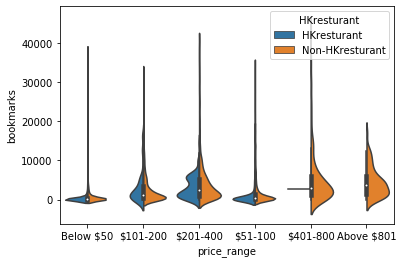

In [375]:
# fig, ax1 = plt.subplots(figsize=(15, 10))
# openrice_2.groupby('HKresturant').plot.bar()
sns.violinplot(data=openrice_2, x = 'price_range' ,y='bookmarks',hue='HKresturant',split=True)


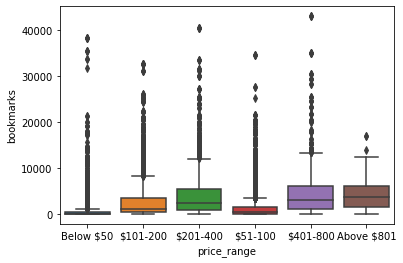

In [376]:
sns.boxplot(data=openrice_2, x = 'price_range' ,y='bookmarks')

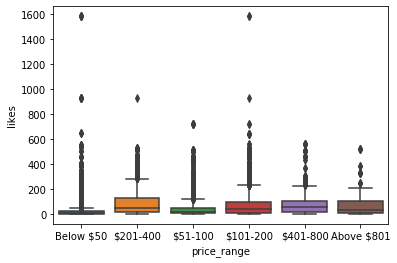

In [10]:
## ANS 
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
import pandas as pd
import numpy as np

sns.boxplot(data=openrice_2,x= 'price_range',y='likes')

In [377]:
# %load solutions/openrice_6.1.py


In [378]:
# %load solutions/openrice_6.2.py


# Unicef Data

When working with data we may aberiviate the columns names to make them simpler to type. However we need to be anle to change them back 


In [20]:
import pandas as pd

In [21]:
unicef = pd.read_csv("https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/unicef/mn.csv")

In [381]:
unicef.head()

,Unnamed: 0,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,1,17,1,1,17,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,2,1,20,1,1,20,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,3,2,1,1,2,1,1,9,8,4,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,4,2,1,5,2,1,5,9,12,4,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,5,2,1,8,2,1,8,9,8,4,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


 ** 1.) ** Drop the unnamed column

In [382]:
unicef= unicef.drop(columns=['Unnamed: 0'])
unicef.head()

,HH1,HH2,LN,MWM1,MWM2,MWM4,MWM5,MWM6D,MWM6M,MWM6Y,...,MCSURV,MCDEAD,mwelevel,mnweight,wscore,windex5,wscoreu,windex5u,wscorer,windex5r
0,1,17,1,1,17,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,1,20,1,1,20,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,2,1,1,2,1,1,9,8,4,2014,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,2,1,5,2,1,5,9,12,4,2014,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,2,1,8,2,1,8,9,8,4,2014,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


In [383]:
# %load solutions/unicef_1.py


** 2.) ** Use the data in `header_df` to replace the `Name` with it's `Label` in the original dataframe.

In [12]:
unicef_header = pd.read_csv("https://raw.githubusercontent.com/jackiekazil/data-wrangling/master/data/unicef/mn_headers.csv")


In [385]:
unicef_header.shape

(209, 3)

In [386]:
# print(unicef.columns)
# print(unicef_header['Name'])

name_list = list(unicef_header['Name'])
label_list = list(unicef_header['Label'])
change = dict(zip(name_list,label_list))
unicef.rename(columns=change)


,Cluster number,Household number,Line number,Cluster number,Household number,Man's line number,Interviewer number,Day of interview,Month of interview,Year of interview,...,Children surviving,Children dead,mwelevel,mnweight,Wealth index score,Wealth index quintiles,wscoreu,windex5u,wscorer,windex5r
0,1,17,1,1,17,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,1,20,1,1,20,1,14,7,4,2014,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,2,1,1,2,1,1,9,8,4,2014,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,2,1,5,2,1,5,9,12,4,2014,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,2,1,8,2,1,8,9,8,4,2014,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9003,682,20,2,682,20,2,913,11,3,2014,...,0.0,0.0,Secondary,0.817528,0.641895,4,-1.650138,1.0,NaN,NaN
9004,682,20,3,682,20,3,918,10,3,2014,...,0.0,0.0,Secondary,0.817528,0.641895,4,-1.650138,1.0,NaN,NaN
9005,682,21,2,682,21,2,913,13,3,2014,...,0.0,0.0,Secondary,0.817528,0.712168,4,-1.436591,1.0,NaN,NaN
9006,682,23,1,682,23,1,913,9,3,2014,...,0.0,0.0,Secondary,0.817528,0.847591,4,-1.025058,1.0,NaN,NaN


In [387]:
unicef_header.head()

,Name,Label,Question
0,HH1,Cluster number,NaN
1,HH2,Household number,NaN
2,LN,Line number,NaN
3,MWM1,Cluster number,NaN
4,MWM2,Household number,NaN


In [388]:
unicef_header['Name'][0]

'HH1'

In [22]:
## ANS
list(zip(unicef_header['Name'],unicef_header['Label']))
dict(zip(unicef_header['Name'],unicef_header['Label']))
unicef.rename(columns=dict(zip(unicef_header['Name'],unicef_header['Label'])),inplace=True)
unicef.head()

,Unnamed: 0,Cluster number,Household number,Line number,Cluster number,Household number,Man's line number,Interviewer number,Day of interview,Month of interview,...,Children surviving,Children dead,mwelevel,mnweight,Wealth index score,Wealth index quintiles,wscoreu,windex5u,wscorer,windex5r
0,1,1,17,1,1,17,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.603670,5,1.272552,5.0,NaN,NaN
1,2,1,20,1,1,20,1,14,7,4,...,0.0,0.0,Higher,0.403797,1.543277,5,1.089026,5.0,NaN,NaN
2,3,2,1,1,2,1,1,9,8,4,...,3.0,0.0,Primary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN
3,4,2,1,5,2,1,5,9,12,4,...,NaN,NaN,NaN,0.000000,0.000000,0,0.000000,0.0,0.0,0.0
4,5,2,1,8,2,1,8,9,8,4,...,0.0,0.0,Secondary,1.031926,0.878635,4,-0.930721,1.0,NaN,NaN


In [389]:
# %load solutions/unicef_2.py


# Ricacorp

** 1.) ** Reading in the file. *Hint*  Which type of format it is? Also you'll need to change the encoding to 'utf-16'

In [390]:
import pandas as pd

In [391]:
ricacorp = pd.read_csv('./data/ricacorp-real-estate-sales.tsv',sep='\t',encoding='utf-16')
ricacorp.head()


,Area,web-scraper-order,web-scraper-start-url,pagination,pagination-href,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,1521007907-3932,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,"Area :\n1,137Ft ($23.3k/Ft)",Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,Loan%︰50%,1st Pay︰$13.25M
1,Kowloon,1521007147-2665,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Area :\n485Ft ($15.4k/Ft),Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,Loan%︰60%,1st Pay︰$3M
2,Kowloon,1521006995-2269,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Area :\n794Ft ($22.6k/Ft),Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,Loan%︰50%,1st Pay︰$9M
3,Kowloon,1521008121-4522,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,Area :\n971Ft ($14.3k/Ft),Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,Loan%︰50%,1st Pay︰$6.99M
4,Kowloon,1521006897-2016,http://www.ricacorp.com/rcproperty/search/d~s~...,Next,http://www.ricacorp.com/rcproperty/search/d~s~...,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,"Area :\n1,502Ft ($16.6k/Ft)",Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,Loan%︰50%,1st Pay︰$12.5M


In [392]:
# %load solutions/ricacorp_1.py


** 2.) ** Remove the useless columns like web-scraper-order, pagination etc.

In [393]:
ricacorp = ricacorp.drop(columns=['web-scraper-order','pagination','web-scraper-start-url','pagination-href'])
ricacorp.head()

,Area,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,"Area :\n1,137Ft ($23.3k/Ft)",Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,Loan%︰50%,1st Pay︰$13.25M
1,Kowloon,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Area :\n485Ft ($15.4k/Ft),Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,Loan%︰60%,1st Pay︰$3M
2,Kowloon,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Area :\n794Ft ($22.6k/Ft),Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,Loan%︰50%,1st Pay︰$9M
3,Kowloon,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,Area :\n971Ft ($14.3k/Ft),Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,Loan%︰50%,1st Pay︰$6.99M
4,Kowloon,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,"Area :\n1,502Ft ($16.6k/Ft)",Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,Loan%︰50%,1st Pay︰$12.5M


In [394]:
# %load solutions/ricacorp_2.py


** 3.) ** *Bonus* - In collumns that should be numerical use regular expressions to get the numbers and convert the columns from strings to numerical.

In [395]:
import re 

In [396]:
ricacorp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            10009 non-null  object 
 1   characteristic  7981 non-null   object 
 2   floor type      9662 non-null   object 
 3   hkd millions    10009 non-null  float64
 4   rent hkd        2416 non-null   object 
 5   area            10009 non-null  object 
 6   address         10009 non-null  object 
 7   last updated    10009 non-null  object 
 8   pay per month   10009 non-null  object 
 9   loan %          10009 non-null  object 
 10  1st payment     10009 non-null  object 
dtypes: float64(1), object(10)
memory usage: 860.3+ KB


In [397]:
# %load solutions/ricacorp_3.py


In [411]:
# ricacorp['rent hkd']=ricacorp['rent hkd'].apply(lambda x:'NaN' if x=='NaN' else re.search(r'\d+',x).group(0))

# ricacorp['rent hkd']=ricacorp['rent hkd'].apply(lambda x:re.search(r'\d+',x).group(0))
import pandas as pd
import re 
ricacorp = pd.read_csv('./data/ricacorp-real-estate-sales.tsv',sep='\t',encoding='utf-16')
ricacorp = ricacorp.drop(columns=['web-scraper-order','pagination','web-scraper-start-url','pagination-href'])


ricacorp['rent hkd']=ricacorp['rent hkd'].str.extract(r'(\d+)k',expand=True)
ricacorp['area']=ricacorp['area'].str.extract(r'(\d+\,?\d+)Ft',expand=True)
ricacorp['pay per month']=ricacorp['pay per month'].str.extract(r'(\d+\.?\d+?)k',expand=True)
ricacorp['loan %']=ricacorp['loan %'].str.extract(r'(\d+)\%',expand=True)
ricacorp['1st payment']=ricacorp['1st payment'].str.extract(r'(\d+\.?\d+?)M',expand=True)

ricacorp['area']=ricacorp['area'].apply(lambda x:x.replace(',',''))
# ricacorp['area'] = ricacorp['area'].replace('\D','',regex=True)      # replace with regex
ricacorp.head()

,Area,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,1137,Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,70.2,50,13.25
1,Kowloon,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,17,485,Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,23.8,60,NaN
2,Kowloon,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,40,794,Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,47.6,50,NaN
3,Kowloon,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,971,Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,37,50,6.99
4,Kowloon,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,1502,Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,66.2,50,12.5


In [414]:
# replace with regex #
import pandas as pd
import re 
ricacorp = pd.read_csv('./data/ricacorp-real-estate-sales.tsv',sep='\t',encoding='utf-16')
ricacorp = ricacorp.drop(columns=['web-scraper-order','pagination','web-scraper-start-url','pagination-href'])
ricacorp['area']=ricacorp['area'].str.replace('\D','',regex=True) 
ricacorp.head()

,Area,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,1137233,Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,Loan%︰50%,1st Pay︰$13.25M
1,Kowloon,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,485154,Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,Loan%︰60%,1st Pay︰$3M
2,Kowloon,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,794226,Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,Loan%︰50%,1st Pay︰$9M
3,Kowloon,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,971143,Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,Loan%︰50%,1st Pay︰$6.99M
4,Kowloon,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,1502166,Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,Loan%︰50%,1st Pay︰$12.5M


In [412]:
ricacorp = ricacorp.astype({"rent hkd": float,'area': float,'pay per month': float,'loan %': float,'1st payment': float})
ricacorp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10009 entries, 0 to 10008
Data columns (total 11 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Area            10009 non-null  object 
 1   characteristic  7981 non-null   object 
 2   floor type      9662 non-null   object 
 3   hkd millions    10009 non-null  float64
 4   rent hkd        2293 non-null   float64
 5   area            10009 non-null  float64
 6   address         10009 non-null  object 
 7   last updated    10009 non-null  object 
 8   pay per month   10002 non-null  float64
 9   loan %          10009 non-null  float64
 10  1st payment     9186 non-null   float64
dtypes: float64(6), object(5)
memory usage: 860.3+ KB


In [46]:
x="Rent $17k\n"
re.search(r'\d+',x).group(0)


'17'

In [48]:
ricacorp.head()

,Area,characteristic,floor type,hkd millions,rent hkd,area,address,last updated,pay per month,loan %,1st payment
0,Kowloon,"Quiet & Boutique Living, Unrivalled Luxury",High Floor Zone (Flat 3),26.50,NaN,"Area :\n1,137Ft ($23.3k/Ft)",Kowloon Tong/Beacon Hill Flat 3 Block A Penins...,Last Updated : 21-02-2018,Pay/M︰$70.2k,Loan%︰50%,1st Pay︰$13.25M
1,Kowloon,"Invite Offers, For Sale & For Lease",High Floor Zone (Flat -) ...,7.50,Rent $17k\n ...,Area :\n485Ft ($15.4k/Ft),Cheung Sha Wan West Flat - Tower 1 Phase 2 The...,Last Updated : 23-02-2018,Pay/M︰$23.8k,Loan%︰60%,1st Pay︰$3M
2,Kowloon,"Spacious Rooms, High Privacy",Low Floor Zone (Flat E) ...,18.00,Rent $40k\n ...,Area :\n794Ft ($22.6k/Ft),Kowloon Station Flat E Tower 2 Phase 1 The Wat...,Last Updated : 13-03-2018,Pay/M︰$47.6k,Loan%︰50%,1st Pay︰$9M
3,Kowloon,"Good Layout & Efficient, Unrepeatable Opportunity",Low Floor Zone (Flat -) ...,13.98,NaN,Area :\n971Ft ($14.3k/Ft),Cheung Sha Wan West Flat - Tower 2 One West Ko...,Last Updated : 22-02-2018,Pay/M︰$37k,Loan%︰50%,1st Pay︰$6.99M
4,Kowloon,"Spacious Rooms, Tranquil Garden View",Low Floor Zone (Flat AB) ...,25.00,NaN,"Area :\n1,502Ft ($16.6k/Ft)",Whampoa/Laguna Verde Flat AB Tower 10 Phase 2 ...,Last Updated : 13-03-2018,Pay/M︰$66.2k,Loan%︰50%,1st Pay︰$12.5M


In [19]:
ricacorp.to_csv("data/ricacorp-clean.csv")